<a href="https://colab.research.google.com/github/mahimathakkar/X-ray-diffraction-patterns-for-line-profile-analysis/blob/main/XRD_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
xrd_si_data=pd.read_csv('/content/drive/Shareddrives/nmeshram@mt.iitr.ac.in/XRD_silicon_std_data.csv')

In [3]:
xrd_test_data=pd.read_csv('/content/drive/Shareddrives/nmeshram@mt.iitr.ac.in/XRD_test_data.csv')

In [4]:
#Visualize both data sets..
xrd_si_data.head()

,Angle,Intensity
0,30.00,190.0000
1,30.02,216.6667
2,30.04,156.0000
3,30.06,201.3333
4,30.08,227.6067


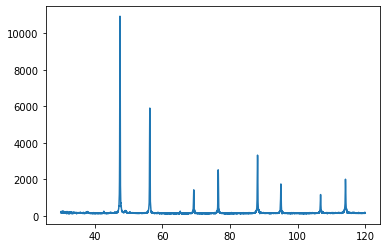

In [5]:
#Plot intensity vs angle for Si standard data
plt.plot('Angle', 'Intensity', data=xrd_si_data)

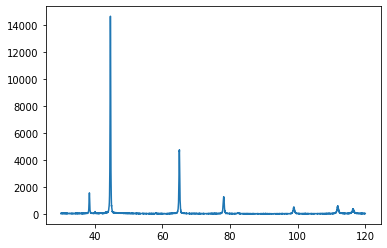

In [6]:
#Plot intensity vs angle for test data
plt.plot('Angle', 'Intensity', data=xrd_test_data)

In [7]:
#Identifying peaks in given datasets

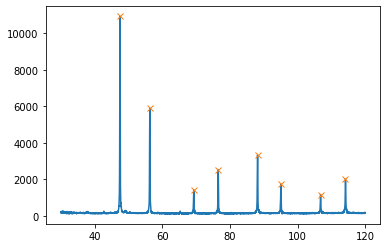

In [8]:
#Peaks in Si standard data
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
x_si = np.array(xrd_si_data['Angle'])
y_si = np.array(xrd_si_data['Intensity'])
peaks_si, _ = find_peaks(y_si,prominence=200)
peak_data_si=pd.DataFrame(columns=['Angle_of_peak','Intensity_of_peak'])
peak_data_si['Angle_of_peak']=np.array(x_si[peaks_si])
peak_data_si['Intensity_of_peak']=np.array(y_si[peaks_si])
# this way the x-axis corresponds to the index of x
plt.plot(x_si, y_si)
plt.plot(x_si[peaks_si], y_si[peaks_si], "x")
plt.show()

##plot in intensity in log scale as well

In [9]:
print(peak_data_si)


   Angle_of_peak  Intensity_of_peak
0          47.50          10942.010
1          56.32           5906.137
2          69.32           1423.979
3          76.54           2520.595
4          88.18           3326.683
5          95.08           1746.806
6         106.82           1166.121
7         114.18           2005.780


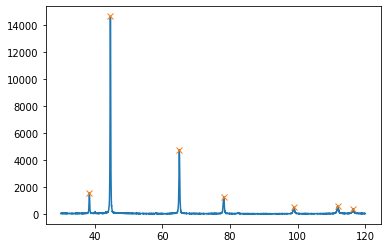

In [10]:
#Peaks in test data
x_test = np.array(xrd_test_data['Angle'])
y_test = np.array(xrd_test_data['Intensity'])
peaks_test, _ = find_peaks(y_test,prominence=200)
peak_data_test=pd.DataFrame(columns=['Angle_of_peak','Intensity_of_peak'])
peak_data_test['Angle_of_peak']=np.array(x_test[peaks_test])
peak_data_test['Intensity_of_peak']=np.array(y_test[peaks_test])
plt.plot(x_test, y_test)
plt.plot(x_test[peaks_test], y_test[peaks_test], "x")
plt.show()

In [11]:
print(peak_data_test)

   Angle_of_peak  Intensity_of_peak
0          38.42          1576.8450
1          44.64         14650.8500
2          65.04          4764.8990
3          78.14          1295.5660
4          98.90           526.2841
5         111.86           613.9078
6         116.34           375.0093


In [12]:
#FWHMs of all peaks

   Angle_of_peak  Intensity_of_peak      fwhm
0          47.50          10942.010  0.209542
1          56.32           5906.137  0.206717
2          69.32           1423.979  0.215254
3          76.54           2520.595  0.217731
4          88.18           3326.683  0.232608
5          95.08           1746.806  0.224442
6         106.82           1166.121  0.244283
7         114.18           2005.780  0.258253


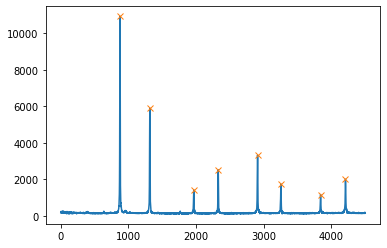

In [33]:
#for si data
from scipy.signal import peak_widths
x_si_indices=[]
for peak in peak_data_si['Angle_of_peak']:
  for i in range(len(x_si)):
    if peak==x_si[i]:
      x_si_indices.append(i)
      break
no_of_indices_si=len(x_si)
factor_indices_to_degree=120/no_of_indices_si
fwhm_si_peaks=pd.DataFrame()
fwhm_si_peaks=peak_data_si
tmp=peak_widths(y_si,x_si_indices , rel_height=0.5)

fwhm_si_peaks['fwhm']=tmp[0]*factor_indices_to_degree
print(fwhm_si_peaks)

plt.plot(y_si)
plt.plot(peaks_si, y_si[x_si_indices], "x")
plt.hlines(*tmp[1:], color="C2")
plt.show()

In [40]:
#for test data
x_test_indices=[]
for peak in peak_data_test['Angle_of_peak']:
  for i in range(len(x_test)):
    if peak==x_test[i]:
      x_test_indices.append(i)
      break
no_of_indices_test=len(x_test)
factor_indices_to_degree_test=120/no_of_indices_test
fwhm_test_peaks=pd.DataFrame()
fwhm_test_peaks=peak_data_test
tmp=peak_widths(y_test,x_test_indices , rel_height=0.5)
fwhm_test_peaks['fwhm']=tmp[0]*factor_indices_to_degree_test
print(fwhm_test_peaks)

print(math.sin(math.degrees(fwhm_test_peaks.iloc[6,0])))

   Angle_of_peak  Intensity_of_peak      fwhm
0          38.42          1576.8450  0.283871
1          44.64         14650.8500  0.282274
2          65.04          4764.8990  0.357038
3          78.14          1295.5660  0.454632
4          98.90           526.2841  0.654273
5         111.86           613.9078  0.650606
6         116.34           375.0093  0.762010
-0.6199055783662921


In [ ]:
#Plot Williamson-Hall Plot

47.5
56.32
69.32
76.54
88.18
95.08
106.82
114.18
          x         y
0  0.737277 -1.074498
1  0.832148 -0.883561
2  0.935567 -0.559650
3  0.972533 -0.368299
4  0.999496 -0.049780
5  0.996072  0.139510
6  0.957219  0.450171
7  0.912263  0.631507


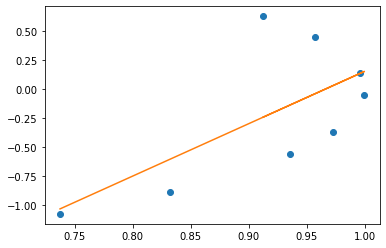

In [66]:
#for Si data
fwhm_si_peaks['fwhm']=fwhm_si_peaks['fwhm']-0.15

wh_data_si=pd.DataFrame()
import math
wh_x_si=[]
for i in range(len(fwhm_si_peaks['fwhm'])):
  wh_x_si.append(math.sin(math.radians(fwhm_si_peaks.iloc[i,0])))
wh_y_si=[]
for i in range(len(fwhm_si_peaks['fwhm'])):
  print(fwhm_si_peaks.iloc[i,0])
  wh_y_si.append(math.cos(math.radians(fwhm_si_peaks.iloc[i,0]))*fwhm_si_peaks.iloc[i,2])
wh_data_si['x']=wh_x_si
wh_data_si['y']=wh_y_si
print(wh_data_si)
m, b = np.polyfit(wh_x_si, wh_y_si, 1)
plt.plot(wh_x_si, wh_y_si, 'o')
wh_y_si_pred=[]
for i in range(len(wh_x_si)):
  wh_y_si_pred.append(m*wh_x_si[i]+b)
plt.plot(wh_x_si,wh_y_si_pred)


In [ ]:
lamda=float(lamda)
E=float(E)
L=float(L)
k=float(k)

In [ ]:
results_fwhm_xrd_si_data=xrd_si_data.copy()
tmp=[]
for val in range(len(results_fwhm_xrd_si_data['Angle'])):
  tmp.append(math.cos(math.radians(results_fwhm_xrd_si_data.iloc[val,0])))


In [ ]:
import math
results_fwhm_xrd_si_data['fwhm']=np.nan
for val in range(len(results_fwhm_xrd_si_data['Angle'])):
  results_fwhm_xrd_si_data.iloc[val,2]=(k*lamda)/(L*(math.cos(math.radians(xrd_si_data.iloc[val,0])))) + 4*E*(math.tan(math.radians(xrd_si_data.iloc[val,0])))

In [ ]:
results_fwhm_xrd_si_data.head()

,Angle,Intensity,fwhm
0,30.00,190.0000,1.602724
1,30.02,216.6667,1.603049
2,30.04,156.0000,1.603374
3,30.06,201.3333,1.603699
4,30.08,227.6067,1.604025
